In [2]:
import spike.spike_analysis.spike_collection as sc
import spike.spike_analysis.spike_recording as sr
import spike.spike_analysis.firing_rate_calculations as fr
import spike.spike_analysis.normalization as norm
import spike.spike_analysis.single_cell as single_cell
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import behavior.boris_extraction as boris
import matplotlib.pyplot as plt

# Ignore these cells - they are initiating a collection so you dont have to

In [3]:
event_dict = {}
subject_dict = {}
j = 1
for file in os.listdir(r"spike\tests\test_data"):
    recording_name_parts = (file.split(".")[0]).split("_")[:-1]
    recording_name = "_".join(recording_name_parts) + "_merged.rec"
    if file.endswith(".csv"):
        subject =['subject']
        behavior = ['facial sniffing', 'anogenital sniffing']
        min_iti = 1 
        min_bout = 0.5
        behavior_df = pd.read_csv(r"spike\tests\test_data\\" + file)
        mouse_in = np.array(behavior_df[behavior_df['Behavior'] == 'mice back in']['Start (s)'].tolist())
        mouse_out = np.array(behavior_df[behavior_df['Behavior'] == 'mice taken out']['Start (s)'].tolist())
        rec_event_dict = {}
        for i in range(5):
            try:
                exp_df = behavior_df[
                    (behavior_df['Start (s)'] > mouse_in[i]) &
                    (behavior_df['Start (s)'] < mouse_out[i])]
            except IndexError:

                exp_df = behavior_df[
                        (behavior_df['Start (s)'] > mouse_in[i])]
            exp_array = boris.get_behavior_bouts(exp_df,subject = subject, behavior = behavior, min_iti = min_iti, min_bout=min_bout)
            rec_event_dict[f'exp{i+1}'] = exp_array
        event_dict[recording_name] = rec_event_dict
        subject = f"Subject {j}"
        subject_dict[recording_name] = subject
        j += 1
        

example_collection = sc.SpikeCollection(path = r"spike\tests\test_data", event_dict = event_dict, subject_dict = subject_dict)
example_collection.analyze(timebin = 100, ignore_freq=0.5, smoothing_window = None)

loading  test_rec2_merged.rec
loading  test_recording_merged.rec
Unit 169 is unsorted & has 88 spikes
Unit 169 will be deleted
loading  test_rec_fewgoodunits_merged.rec
loading  test_rec_nogoodunits_merged.rec
test_rec_nogoodunits_merged.rec has no good units
and will not be included in the collection
All set to analyze


In [4]:
#TODO 
#bootstrap w/ 100 permutations
#plot_raster



# Single Cell Analysis

This notebook should be used to familiarize yourself with the functions available in the single cell python script used for single cell analysis of spike recording and spike colleciton objects. 

## Wilcoxon Signed-Rank vs Rank-Sum

The first set of functions from the single cell python script have to with two Wilcoxon tests: signed-rank and rank-sum. Wilcoxon tests are used to test the responsiveness of single cells towards specific stimuli. 

Signed-rank is for paired or related samples. Thus, the wilcoxon_collection function (which utilizes the signed-rank test) is for comparing the firing rates a cell during a stimulus to a baseline period prior to the stimulus. Thus, each stimulus firing rate is paired with the baseline firing rate immediately prior to stimulus onset. 

Rank-sum test (also known as a Mann-Whitney U test) is for independent samples. The function wilcoxon_event1v2_colleciton utilizes the rank-sum test. It can take in any two events and compares the firing rates between the two events for significant differences. Because they are indepedent samples, there need not be the same number of samples across events. 


Wilcoxon can't be done on test_rec_fewgoodunits_merged.rec exp1, because <6 samples


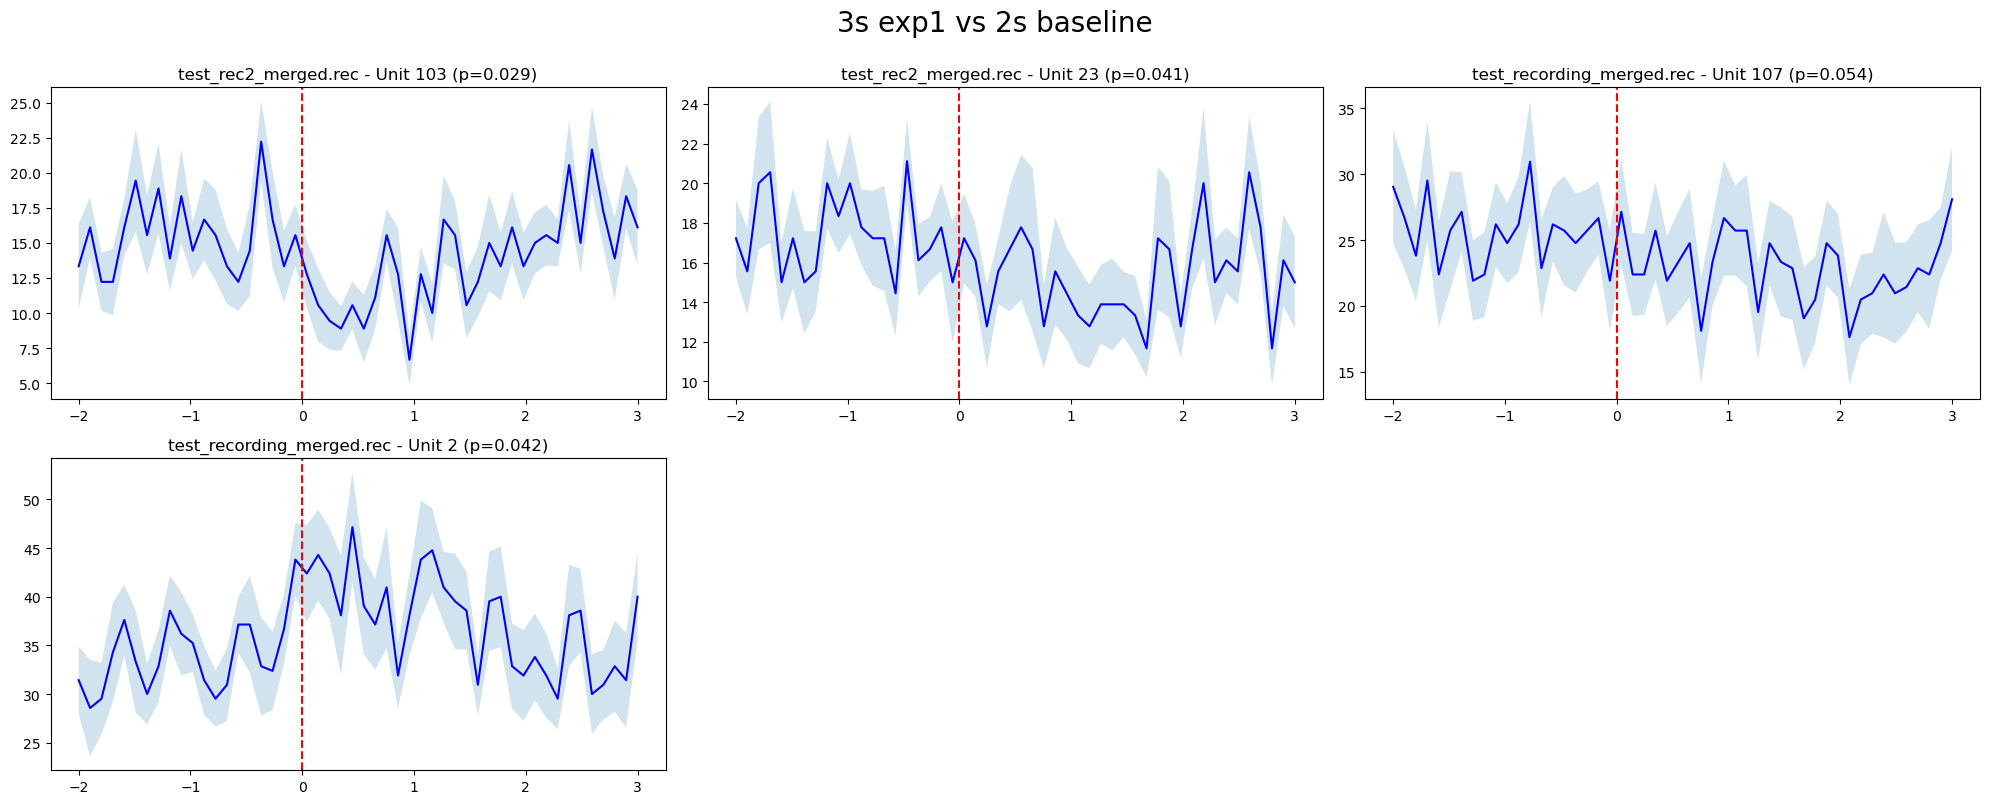

,Event,original unit id,Wilcoxon Stat,p value,Recording,Subject,event1 vs event2
0,3s exp1 vs 2s baseline,103,35.5,0.029384,test_rec2_merged.rec,Subject 1,increases
1,3s exp1 vs 2s baseline,23,38.5,0.040504,test_rec2_merged.rec,Subject 1,increases
2,3s exp1 vs 2s baseline,8,72.0,0.556439,test_rec2_merged.rec,Subject 1,not significant
3,3s exp1 vs 2s baseline,10,75.0,0.647237,test_rec2_merged.rec,Subject 1,not significant
4,3s exp1 vs 2s baseline,82,62.0,0.305988,test_rec2_merged.rec,Subject 1,not significant
5,3s exp1 vs 2s baseline,67,73.0,0.868315,test_rec2_merged.rec,Subject 1,not significant
6,3s exp1 vs 2s baseline,95,69.0,0.495079,test_rec2_merged.rec,Subject 1,not significant
7,3s exp1 vs 2s baseline,102,30.0,0.087825,test_rec2_merged.rec,Subject 1,not significant
8,3s exp1 vs 2s baseline,47,69.0,0.471821,test_rec2_merged.rec,Subject 1,not significant
9,3s exp1 vs 2s baseline,12,54.5,0.484988,test_rec2_merged.rec,Subject 1,not significant


In [5]:
exp1_wilcox = single_cell.wilcoxon_collection(spike_collection=example_collection,
                                event = 'exp1', #name of event used in the event_dict
                                event_length = 3, # in seconds
                                baseline_window=2, # in seconds
                                plot = True)
exp1_wilcox         

Wilcoxon can't be done on test_recording_merged.rec because <6 samples for either exp1 or exp5
Wilcoxon can't be done on test_rec_fewgoodunits_merged.rec because <6 samples for either exp1 or exp5


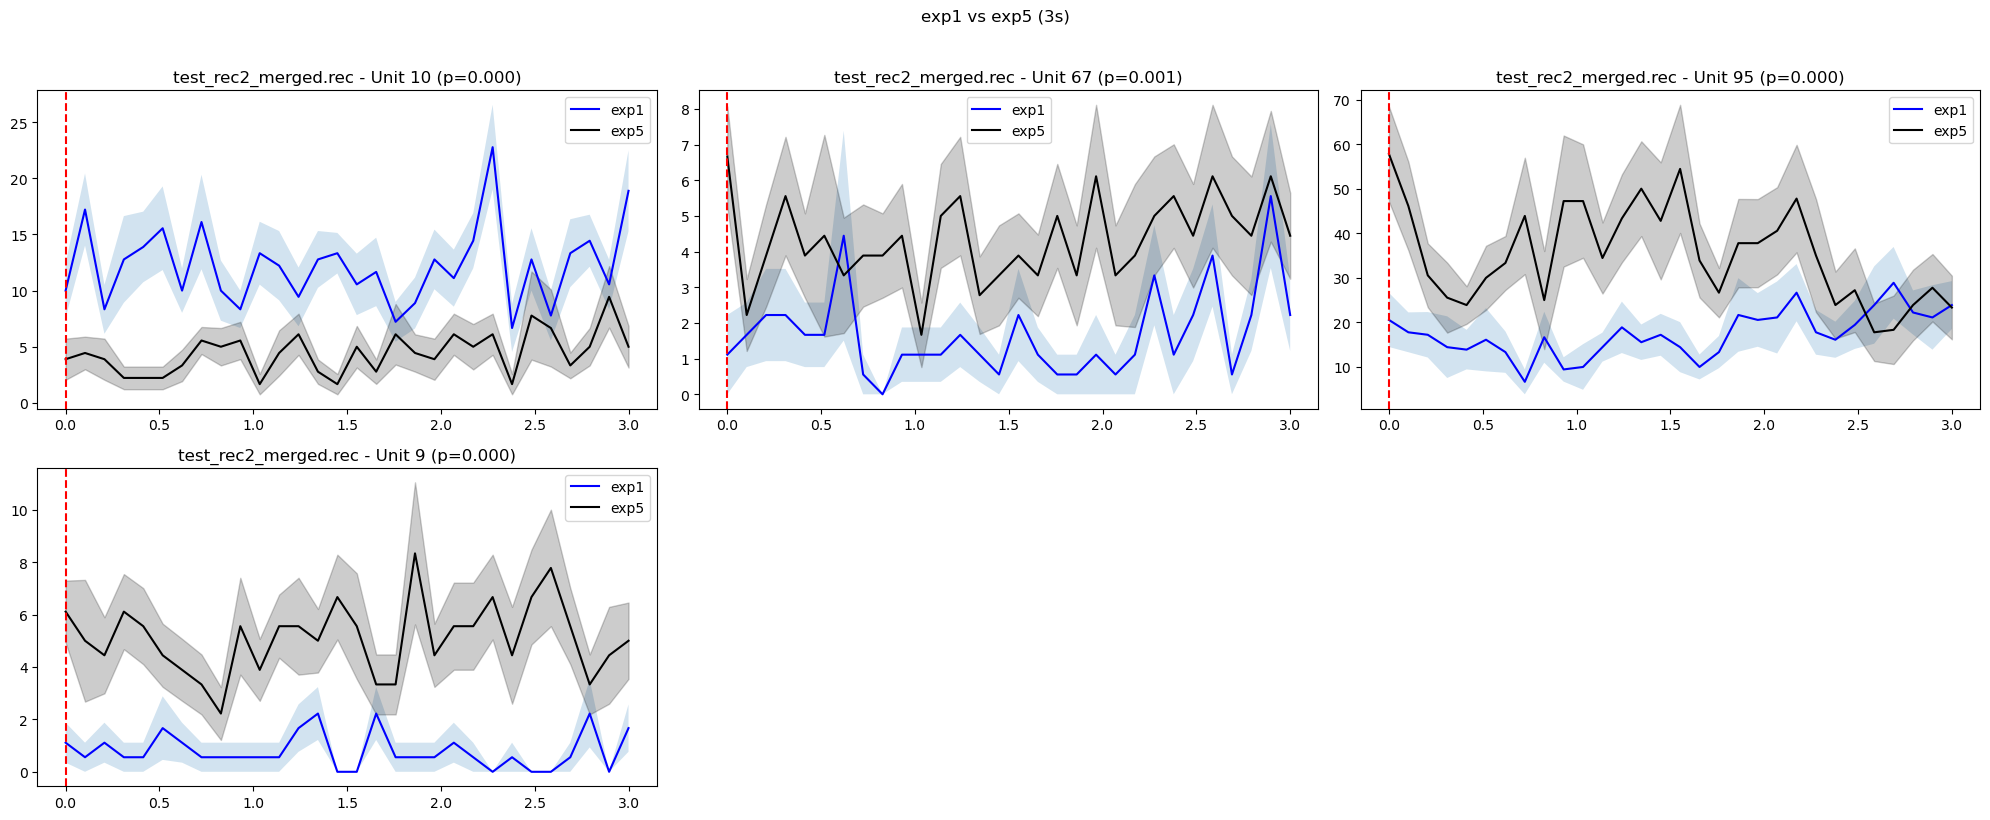

,Event,original unit id,Wilcoxon Stat,p value,Recording,Subject,event1 vs event2
0,exp1 vs exp5 (3s),103,-1.439556,1.499930e-01,test_rec2_merged.rec,Subject 1,not significant
1,exp1 vs exp5 (3s),23,0.885881,3.756818e-01,test_rec2_merged.rec,Subject 1,not significant
2,exp1 vs exp5 (3s),8,1.740123,8.183742e-02,test_rec2_merged.rec,Subject 1,not significant
3,exp1 vs exp5 (3s),10,4.745790,2.076941e-06,test_rec2_merged.rec,Subject 1,increases
4,exp1 vs exp5 (3s),82,0.047458,9.621483e-01,test_rec2_merged.rec,Subject 1,not significant
5,exp1 vs exp5 (3s),67,-3.258776,1.118941e-03,test_rec2_merged.rec,Subject 1,decreases
6,exp1 vs exp5 (3s),95,-4.018102,5.866876e-05,test_rec2_merged.rec,Subject 1,decreases
7,exp1 vs exp5 (3s),102,-0.253109,8.001841e-01,test_rec2_merged.rec,Subject 1,not significant
8,exp1 vs exp5 (3s),47,-0.110735,9.118264e-01,test_rec2_merged.rec,Subject 1,not significant
9,exp1 vs exp5 (3s),12,1.740123,8.183742e-02,test_rec2_merged.rec,Subject 1,not significant


In [7]:
exp1v5_wilcox = single_cell.wilcoxon_event1v2_collection(spike_collection=example_collection,
                                event1 = 'exp1', #name of event used in the event_dict
                                event2= 'exp5', #name of event used in the event_dict
                                event_length = 3, # in seconds
                               pre_window=0, # in seconds , only used for plotting
                                plot = True)
exp1v5_wilcox   

### Assignment 1: Wilcoxon

In [ ]:
# use this cell to calculate what the averge length of a sniffing bout is for exp 2 


In [ ]:
# How many cells signigicantly change their firing rate in response to sniffing during exp2? 
# (with an event length of an average sniffing bout calculated above)
# compared to 2 second baselien window? 

In [ ]:
# I want to know how many cells significantly change their firing rates 
# between exp1 and exp4? 



In [ ]:
# using wilcoxon_rec(), how would you run the wilcoxon test on only one of the recordings? 
# try to access 1 recording and successfully run both wilcoxon_rec() and wilcoxon_event1v2_rec() on it.

# single_rec_wilcox = 
# single_rec_event1v2 = 



## Fisher's Exact Test

Fisher's exact test is used is for small smample sizes to test differences in proportions through contigency tables of 2x2. For example, if I want to test whether a significantly greater portion of cells responds to exposure 1 sniffs over exposure 2 sniffs, I could use this test where the contigency table would be made up of:

|                | Exp 1  | Exp 2  |
| -------------- | ------ | ------ |
| Signifcant     | a      | b      |
| Not signifcant | c      | d      |




where a is the number of cells that significantly changed their firing rates compared to baseline for exp 1, and b is the number of cells that significantly changed their firing rates compared to baseline for exp 2. c would be the number of cells that did not significantly changed their firing rates compared to baseline for exp 1 and similary for d for exp 2.

In [ ]:
# in practice this would look like: 

odds_ratio, p_vlaue, table = single_cell.fisher_exact_wilcoxon(spike_collection=example_collection,
                                            event1 = 'exp1', #name of event used in the event_dict
                                            event2= 'exp2', #name of event used in the event_dict
                                            event_length = 3, # in seconds
                                            baseline_window=2, # in seconds 
                                            )
print('stat: ', odds_ratio)
print('p value: ', p_vlaue)
print('contingency matrix')
table

Wilcoxon can't be done on test_rec_fewgoodunits_merged.rec exp1, because <6 samples
Wilcoxon can't be done on test_rec_fewgoodunits_merged.rec exp2, because <6 samples
stat:  1.5714285714285714
p value:  1.0
contingency matrix


,Significant,Non-Significant
exp1,3,21
exp2,2,22


### Assignment 2: Fisher's Exact

In [ ]:
# use this cell to calculate the fishers exact test for any other two events 

In [ ]:
# now lets use this event3 argument. Lets say we want to know 
# if significantly different amounts of cells differ between exp1 and exp 2 
# vs exp 1 and exp 5 , using exp1 as event3 , run another fishers exact test

 

## Bootstrapping Method

### Assignment 3: bootstrapping

## Raster Plots

### Assignment 4: plotting